In [56]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import glob
import random
import time
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [57]:
Path = "D:\\study\\Landscape_Classification"

In [58]:
def blurImages(images):
    blurred = np.zeros_like(images)
    for i in range(len(images)):
        B = images[i][:75*75]
        G = images[i][75*75:2*75*75]
        R = images[i][2*(75*75):]
        b = cv2.resize(B,(75,75))
        g = cv2.resize(G,(75,75))
        r = cv2.resize(R,(75,75))
        bgr = np.dstack((b,g,r))
        blur = cv2.GaussianBlur(bgr,(5,5),0)
        blurred[i] = blur.flatten()
        print(i)
    return blurred

In [59]:
def labelToNum(label):
    if label == 'Coast':
        return 1
    if label ==  'Desert':
        return 2
    if label == 'Forest':
        return 3
    if label == 'Glacier':
        return 4
    if label == 'Mountain':
        return 5

In [60]:
def LoadImages(Path):
    Training = False
    if 'Training' in Path:
        data = np.ndarray((2*10000,75*75*3))
        Training = True
    elif 'Validation' in Path:
        data = np.ndarray((1500,75*75*3))
    else:
        data = np.ndarray((500,75*75*3))
    labels = []
    first = True
    paths = os.listdir(Path)
    i = 0
    for Dir in paths:
        dir_time = time.time()
        for file in os.listdir(f"{Path}\\{Dir}"):
            image = cv2.imread(f"{Path}\\{Dir}\\{file}")#RGB
            image = cv2.resize(image,(75,75))#smaller resolution, dont want too big images
            pixels = image.flatten()
            data[i] = pixels
            i +=1
            labels.append(labelToNum(Dir))
            if Training:
                image = cv2.flip(image,1)#Adding flipped horizontaly image to make more training examples
                pixels = image.flatten()
                data[i] = pixels
                i +=1
                labels.append(labelToNum(Dir))

    return data,labels

In [61]:
def LoadData():
    train_data, train_labels = LoadImages(f"{Path}\\Training")
    valid_data, valid_labels = LoadImages(f"{Path}\\Validation")
    test_data, test_labels = LoadImages(f"{Path}\\Testing")
    return train_data,train_labels,valid_data,valid_labels,test_data,test_labels

In [ ]:
train_data,train_labels,valid_data,valid_labels,test_data,test_labels = LoadData()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
logic = LogisticRegression(random_state = 5)
scores = cross_val_score(logic, train_data, train_labels, cv=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [ ]:
base = KNeighborsClassifier(n_neighbors=10)
base.fit(train_data,train_labels)

In [ ]:
base.score(train_data,train_labels)

In [45]:
n_range = np.arange(50,1001,50)
valid_scores = []
train_scores = []
for n in n_range:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(train_data,train_labels)
    valid_scores.append(knn.score(valid_data,valid_labels))
    train_scores.append(knn.score(train_data,train_labels))

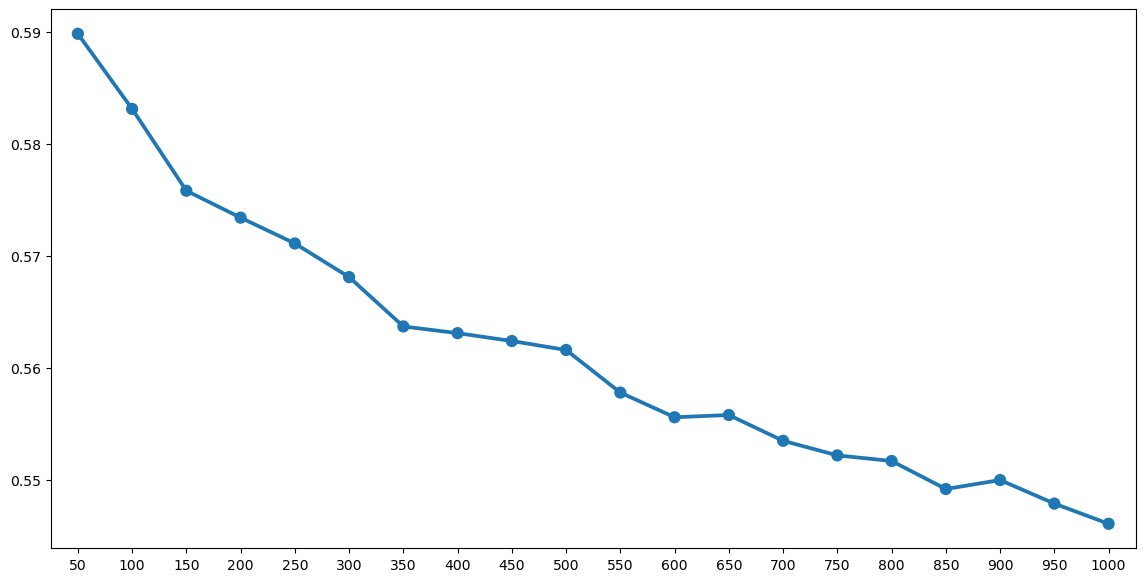

In [46]:
plt.figure(figsize = [14,7])
sns.pointplot(x = n_range, y = train_scores);

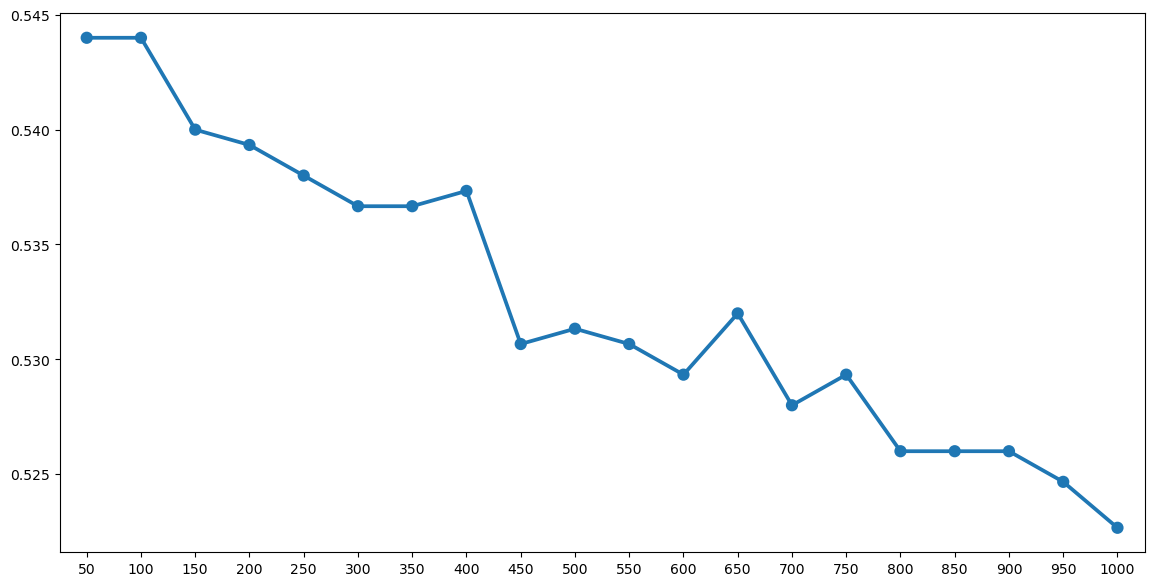

In [47]:
plt.figure(figsize = [14,7])
sns.pointplot(x = n_range, y = valid_scores);

In [39]:
from sklearn.svm import LinearSVC

In [40]:
base_svm = LinearSVC()

In [41]:
base_svm.fit(train_data,train_labels)

LinearSVC()

In [43]:
base_svm.score(train_data,train_labels)

0.9958

In [44]:
base_svm.score(valid_data,valid_labels)

0.442

In [48]:
from sklearn.svm import NuSVC

In [50]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
t_score_svc = []
v_score_svc = []
for kernel in kernels:
    start = time.time()
    clf = NuSVC(kernel=kernel)
    clf.fit(train_data,train_labels)
    v_score_svc.append(clf.score(valid_data,valid_labels))
    t_score_svc.append(clf.score(train_data,train_labels))
    print(f"finished {kernel}, took {time.time() - start} seconds")

finished linear, took 1348.902156829834 seconds
finished poly, took 28456.268578767776 seconds
finished rbf, took 3296.013557910919 seconds
finished sigmoid, took 1296.6154189109802 seconds


In [51]:
v_score_svc

[0.58, 0.5986666666666667, 0.6193333333333333, 0.33866666666666667]

In [52]:
t_score_svc

[0.6961, 0.7017, 0.7466, 0.346]

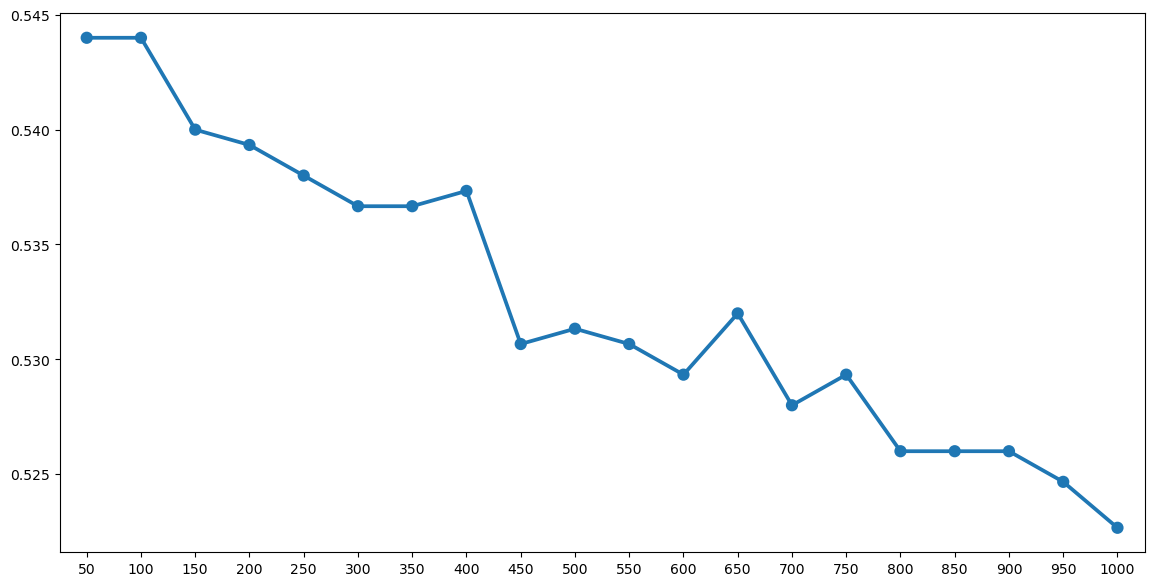

In [53]:
plt.figure(figsize = [14,7])
sns.pointplot(x = n_range, y = valid_scores);

<BarContainer object of 4 artists>

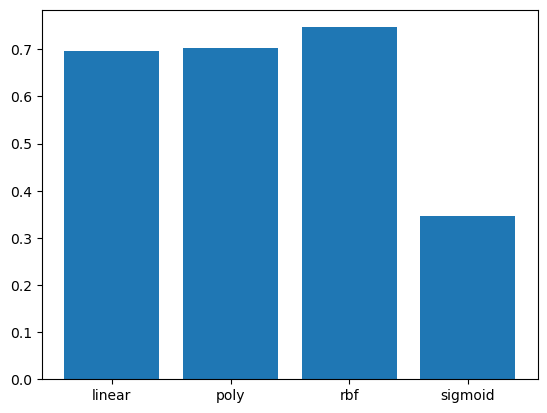

In [54]:
plt.bar(kernels,t_score_svc)

<BarContainer object of 4 artists>

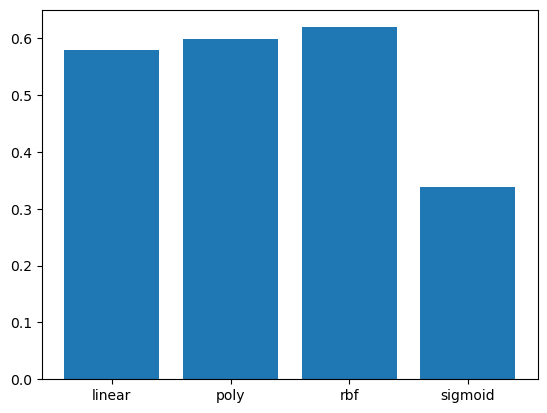

In [55]:
plt.bar(kernels,v_score_svc)